# 개별 코드

In [1]:
# 랜덤 시드 설정
import numpy as np
import tensorflow as tf
np.random.seed(0)
tf.random.set_seed(0)

In [2]:
# 데이터 불러오기
from tensorflow.keras.datasets import imdb
(X_tn0,y_tn0),(X_te0,y_test)=imdb.load_data(num_words=2000)

17465344/17464789 [==============================] - 1s 0us/step


<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
C:\Users\onlywin7788\anaconda3\lib\site-packages\tensorflow\python\keras\datasets\imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
C:\Users\onlywin7788\anaconda3\lib\site-packages\tensorflow\python\keras\datasets\imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. 

In [3]:
# 원본 데이터 차원 확인
print(X_tn0.shape)
print(y_tn0.shape)
print(X_te0.shape)
print(y_test.shape)

(25000,)
(25000,)
(25000,)
(25000,)


In [5]:
# 트레이닝/밸리데이션셋 분리
X_train = X_tn0[0:20000]
y_train = y_tn0[0:20000]
X_valid = X_tn0[20000:25000]
y_valid = y_tn0[20000:25000]

In [6]:
print(X_train.shape)
print(y_train.shape)
print(X_valid.shape)
print(y_valid.shape)

(20000,)
(20000,)
(5000,)
(5000,)


In [7]:
# 피쳐 데이터 형태 확인
print(X_train[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 2, 66, 2, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 2, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2, 19, 14, 22, 4, 1920, 2, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2, 2, 16, 480, 66, 2, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 2, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 2, 113, 103, 32, 15, 16, 2, 19, 178, 32]


In [8]:
# 개별 피쳐 크기 확인
print(len(X_train[0]))
print(len(X_train[1]))

218
189


In [9]:
# 타겟 클래스 확인
print(set(y_test))
print(len(set(y_test)))

{0, 1}
2


In [10]:
# 피쳐 데이터 변형
from tensorflow.keras.preprocessing import sequence
X_train = sequence.pad_sequences(X_train, maxlen=100)
X_valid = sequence.pad_sequences(X_valid, maxlen=100)
X_test = sequence.pad_sequences(X_te0, maxlen=100)

In [11]:
print(X_train.shape)
print(X_valid.shape)
print(X_test.shape)

(20000, 100)
(5000, 100)
(25000, 100)


In [12]:
# LSTM 모형 생성
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Conv1D
from tensorflow.keras.layers import MaxPooling1D


model = Sequential()
model.add(Embedding(input_dim=2000, output_dim=100))
model.add(Conv1D(50, kernel_size=3, 
                 padding='valid', 
                 activation='relu'))
model.add(MaxPooling1D(pool_size=3))
model.add(LSTM(100, activation='tanh'))
model.add(Dropout(0.25))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 100)         200000    
_________________________________________________________________
conv1d (Conv1D)              (None, None, 50)          15050     
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, None, 50)          0         
_________________________________________________________________
lstm (LSTM)                  (None, 100)               60400     
_________________________________________________________________
dropout (Dropout)            (None, 100)               0         
_________________________________________________________________
dense (Dense)                (None, 1)                 101       
Total params: 275,551
Trainable params: 275,551
Non-trainable params: 0
__________________________________________________

In [13]:
# 모형 컴파일
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [14]:
# 학습
hist = model.fit(X_train, y_train, 
                 batch_size=100, 
                 epochs=10, 
                 validation_data=(X_valid, y_valid))

Epoch 1/10
200/200 [==============================] - 17s 67ms/step - loss: 0.5739 - accuracy: 0.6634 - val_loss: 0.3881 - val_accuracy: 0.8270
Epoch 2/10
200/200 [==============================] - 11s 54ms/step - loss: 0.3468 - accuracy: 0.8543 - val_loss: 0.3738 - val_accuracy: 0.8290
Epoch 3/10
200/200 [==============================] - 11s 54ms/step - loss: 0.2934 - accuracy: 0.8800 - val_loss: 0.3725 - val_accuracy: 0.8310
Epoch 4/10
200/200 [==============================] - 11s 55ms/step - loss: 0.2487 - accuracy: 0.9032 - val_loss: 0.3865 - val_accuracy: 0.8322
Epoch 5/10
200/200 [==============================] - 11s 55ms/step - loss: 0.1963 - accuracy: 0.9300 - val_loss: 0.4494 - val_accuracy: 0.8182
Epoch 6/10
200/200 [==============================] - 11s 54ms/step - loss: 0.1239 - accuracy: 0.9578 - val_loss: 0.4219 - val_accuracy: 0.8222
Epoch 7/10
200/200 [==============================] - 11s 55ms/step - loss: 0.0900 - accuracy: 0.9733 - val_loss: 0.5526 - val_accuracy:

In [15]:
# 트레이닝 데이터 평가
print(model.evaluate(X_train, y_train)[1])
print(model.evaluate(X_valid, y_valid)[1])

625/625 [==============================] - 8s 11ms/step - loss: 0.0114 - accuracy: 0.9984
0.9983500242233276
157/157 [==============================] - 3s 11ms/step - loss: 0.7751 - accuracy: 0.8192
0.8191999793052673


In [16]:
# 테스트 데이터 평가
print(model.evaluate(X_test, y_test)[1])

782/782 [==============================] - 9s 11ms/step - loss: 0.7344 - accuracy: 0.8266
0.8266400098800659


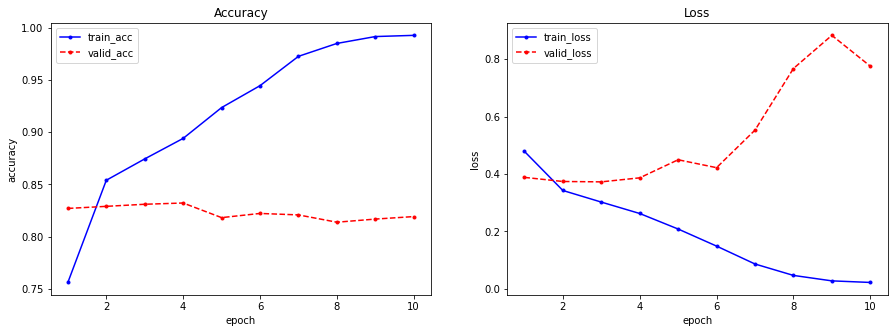

In [17]:
# 정확도 학습 그래프
import numpy as np
epoch = np.arange(1,11)
acc_train = hist.history['accuracy'] 
acc_valid = hist.history['val_accuracy']
loss_train = hist.history['loss'] 
loss_valid = hist.history['val_loss']

import matplotlib.pyplot as plt
plt.figure(figsize=(15,5))
plt.subplot(121)
plt.plot(epoch, acc_train,'b',
         marker='.',
         label='train_acc')
plt.plot(epoch, acc_valid,'r--',
         marker='.',
         label='valid_acc')
plt.title('Accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()
plt.subplot(122)
plt.plot(epoch,loss_train,'b',
         marker='.',
         label='train_loss')
plt.plot(epoch,loss_valid,'r--',
         marker='.',
         label='valid_loss')
plt.title('Loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show()

# 통합 코드

<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
C:\Users\onlywin7788\anaconda3\lib\site-packages\tensorflow\python\keras\datasets\imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
C:\Users\onlywin7788\anaconda3\lib\site-packages\tensorflow\python\keras\datasets\imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. 

(25000,)
(25000,)
(25000,)
(25000,)
[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 2, 66, 2, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 2, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2, 19, 14, 22, 4, 1920, 2, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2, 2, 16, 480, 66, 2, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 2, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 2, 113, 103, 32, 15, 16, 2, 19, 178, 32]
218
189
{0, 1}
2
Model: "sequential_1"
______________________________

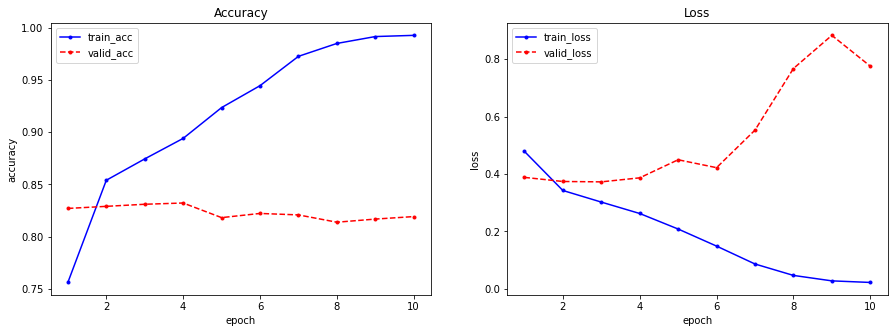

In [18]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Conv1D
from tensorflow.keras.layers import MaxPooling1D

import matplotlib.pyplot as plt

# 랜덤 시드 설정
np.random.seed(0)
tf.random.set_seed(0)

# 데이터 불러오기
(X_tn0,y_tn0),(X_te0,y_test)=imdb.load_data(num_words=2000)

# 원본 데이터 차원 확인
print(X_tn0.shape)
print(y_tn0.shape)
print(X_te0.shape)
print(y_test.shape)

# 트레이닝/밸리데이션셋 분리
X_train = X_tn0[0:20000]
y_train = y_tn0[0:20000]
X_valid = X_tn0[20000:25000]
y_valid = y_tn0[20000:25000]

# 피쳐 데이터 형태 확인
print(X_train[0])

# 개별 피쳐 크기 확인
print(len(X_train[0]))
print(len(X_train[1]))

# 타겟 클래스 확인
print(set(y_test))
print(len(set(y_test)))

# 피쳐 데이터 변형
X_train = sequence.pad_sequences(X_train, maxlen=100)
X_valid = sequence.pad_sequences(X_valid, maxlen=100)
X_test = sequence.pad_sequences(X_te0, maxlen=100)


# LSTM 모형 생성
model = Sequential()
model.add(Embedding(input_dim=2000, output_dim=100))
model.add(Conv1D(50, kernel_size=3, 
                 padding='valid', 
                 activation='relu'))
model.add(MaxPooling1D(pool_size=3))
model.add(LSTM(100, activation='tanh'))
model.add(Dropout(0.25))
model.add(Dense(1, activation='sigmoid'))
model.summary()

# 모형 컴파일
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# 학습
hist = model.fit(X_train, y_train, 
                 batch_size=100, 
                 epochs=10, 
                 validation_data=(X_valid, y_valid))

# 트레이닝 데이터 평가
print(model.evaluate(X_train, y_train)[1])
print(model.evaluate(X_valid, y_valid)[1])

# 테스트 데이터 평가
print(model.evaluate(X_test, y_test)[1])

# 정확도 학습 그래프
epoch = np.arange(1,11)
acc_train = hist.history['accuracy'] 
acc_valid = hist.history['val_accuracy']
loss_train = hist.history['loss'] 
loss_valid = hist.history['val_loss']

plt.figure(figsize=(15,5))
plt.subplot(121)
plt.plot(epoch, acc_train,'b',
         marker='.',
         label='train_acc')
plt.plot(epoch, acc_valid,'r--',
         marker='.',
         label='valid_acc')
plt.title('Accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()
plt.subplot(122)
plt.plot(epoch,loss_train,'b',
         marker='.',
         label='train_loss')
plt.plot(epoch,loss_valid,'r--',
         marker='.',
         label='valid_loss')
plt.title('Loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show()
